In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
!pip install scipy==1.10.0

In [4]:
import scipy
print(scipy.__version__)

1.10.0


In [5]:
train_df=pd.read_csv("Corona_NLP_train.csv", encoding='latin')

In [6]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [9]:
test_df=pd.read_csv("Corona_NLP_test.csv", encoding='latin')

In [13]:
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@\S+|#[A-Za-z0-9]+|\$[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\,{2,}', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s.,\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohitsarin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohitsarin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'\.{2,}', '.', text)
    text = re.sub(r'[^a-zA-Z\s.,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@\S+|#[A-Za-z0-9]+|\$[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\,{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s.,\']', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    preprocessed_text = ''.join(text)
    return preprocessed_text

In [17]:
clean_data=lambda text:clean_text(text)
train_df["OriginalTweet"]=train_df["OriginalTweet"].apply(clean_data)

In [18]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the outb...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,response to complaint not provided citing covi...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,you know it s getting tough when is rationing ...,Positive
41155,44954,89906,NaN,14-04-2020,is it wrong that the smell of hand sanitizer i...,Neutral


In [21]:
preprocess_data=lambda text:preprocess_text(text)
train_df["text_prepro"]=train_df["OriginalTweet"].apply(preprocess_data)

In [22]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_prepro
0,3799,48751,London,16-03-2020,and and,Neutral,
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"coronaviru australia woolworth give elderli , ..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"food stock one empti pleas , n't panic , enoug..."
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the outb...",Extremely Negative,", readi go supermarket outbreak . 'm paranoid ..."
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock supermarket shelv loc...
41153,44952,89904,NaN,14-04-2020,response to complaint not provided citing covi...,Extremely Negative,respons complaint provid cite covid relat dela...
41154,44953,89905,NaN,14-04-2020,you know it s getting tough when is rationing ...,Positive,know get tough ration toilet paper martinsvil ...
41155,44954,89906,NaN,14-04-2020,is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanit start turn


In [25]:
float_indexes = []
for index, value in train_df['text_prepro'].items():
    if isinstance(value, float):
        float_indexes.append(index)
print("Null Index 'documents':", float_indexes)

Null Index 'documents': []


In [26]:
null_indexes = []
for index, value in train_df['text_prepro'].items():
    if pd.isnull(value) or value.strip() == "":
        null_indexes.append(index)
print("Null Index 'documents':", null_indexes)

Null Index 'documents': [0, 16, 186, 397, 583, 2190, 5946, 8803, 9169, 10946, 12410, 13452, 13777, 14425, 14840, 16342, 16924, 17761, 19828, 22994, 28549, 29888, 30345, 30473, 31293, 31440, 31627, 31657, 32455, 33587, 35563, 35565, 35752, 36983, 37646, 38226, 40511, 41141]


In [27]:
train_df = train_df.drop(null_indexes)
train_df = train_df.reset_index(drop=True)

In [28]:
X=train_df.drop(["UserName","ScreenName","Location","TweetAt","OriginalTweet","Sentiment"],axis=1)
y=train_df["Sentiment"]

In [29]:
X

,text_prepro
0,advic talk neighbour famili exchang phone numb...
1,"coronaviru australia woolworth give elderli , ..."
2,"food stock one empti pleas , n't panic , enoug..."
3,", readi go supermarket outbreak . 'm paranoid ..."
4,news region first confirm covid case came sull...
...,...
41114,airlin pilot offer stock supermarket shelv loc...
41115,respons complaint provid cite covid relat dela...
41116,know get tough ration toilet paper martinsvil ...
41117,wrong smell hand sanit start turn


In [30]:
y

0                  Positive
1                  Positive
2                  Positive
3        Extremely Negative
4                  Positive
                ...        
41114               Neutral
41115    Extremely Negative
41116              Positive
41117               Neutral
41118              Negative
Name: Sentiment, Length: 41119, dtype: object

In [31]:
tokenized_documents=[preprocess_text2(doc) for doc in X["text_prepro"]]

In [32]:
len(tokenized_documents)

41119

In [156]:
!pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.7.0 from https://files.pythonhosted.org/packages/0d/3e/d05b9de83677195886fb79844fcca19609a538db63b1790fa373155bc3cf/scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 4.0 MB/s eta 0:00:00
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/c0/bc/77635c657a3668cf652806210b8662e1aff84b818a55ba88257abf6637a8/numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for simpful==2.12.0 from https://files.p

In [33]:
from gensim.models import Word2Vec

In [34]:
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents, 
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [35]:
print(word2vec_model)

Word2Vec<vocab=22831, vector_size=100, alpha=0.025>


In [36]:
all_words =word2vec_model.wv.index_to_key

In [37]:
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

. : 0
, : 1
covid : 2
price : 3
store : 4
supermarket : 5
food : 6
groceri : 7
peopl : 8
amp : 9
consum : 10
shop : 11
go : 12
get : 13
need : 14
's : 15
onlin : 16
time : 17
buy : 18
work : 19
worker : 20
hand : 21
pandem : 22
like : 23
help : 24
sanit : 25
stock : 26
panic : 27
home : 28
n't : 29
demand : 30
us : 31
coronaviru : 32
one : 33
make : 34
suppli : 35
day : 36
take : 37
due : 38
use : 39
keep : 40
mask : 41
week : 42
plea : 43
new : 44
stay : 45
see : 46
busi : 47
market : 48
crisi : 49


In [38]:
max_length =train_df['text_prepro'].apply(lambda x: len(x.split())).max()

In [39]:
max_length

55

In [40]:
max_length_index = train_df['text_prepro'].apply(len).idxmax()
print("Max Length Index :", max_length_index)

Max Length Index : 37122


In [41]:
train_df.at[max_length_index, 'text_prepro']

'nisan cumartesi itibariyl bb nin hizmetleri soka kma serbestisi olanlar devam edecek . halk ekmek hamidiy su retim ge ti . bb , stanbul un g da ihtiyac na yetecek kapasitededir . halk z sakin olsun g vend hissetsin . l tfen herk evin ns n .'

In [42]:
train_df.at[max_length_index, 'OriginalTweet']


' nisan cumartesi itibariyle bb nin t m hizmetleri soka a kma serbestisi olanlar i in devam edecek. halk ekmek ve hamidiye su retime ge ti. bb, t m stanbul un g da ihtiyac na yetecek kapasitededir. halk m z sakin olsun ve g vende hissetsin. l tfen herkes evine d ns n.'

In [43]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text] 
             for text in [preprocess_text2(doc) for doc in X['text_prepro']]]

In [52]:
sequences[0]

[452,
 318,
 1377,
 115,
 1872,
 651,
 308,
 340,
 329,
 242,
 651,
 308,
 1377,
 409,
 72,
 1801,
 2861,
 346,
 16,
 11,
 746,
 8668,
 2095,
 35,
 912,
 1867,
 86]

In [53]:
from keras.preprocessing.sequence import pad_sequences

In [54]:
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [55]:
padded_sequences

array([[ 452,  318, 1377, ...,    0,    0,    0],
       [  32,  692, 3230, ...,    0,    0,    0],
       [   6,   26,   33, ...,    0,    0,    0],
       ...,
       [  67,   13, 1326, ...,    0,    0,    0],
       [ 612, 2252,   21, ...,    0,    0,    0],
       [ 132,   44,   39, ...,    0,    0,    0]], dtype=int32)

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [57]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(padded_sequences,y,
                    test_size=0.2,random_state=42, stratify=y)

In [59]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [60]:
number_of_classes=len(np.unique(y))

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, MultiHeadAttention, GlobalMaxPooling1D, LayerNormalization, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l2

In [62]:
def build_transformer_model(max_length, vocab_size, embedding_dim, num_heads, ff_dim, num_classes):
    inputs = Input(shape=(max_length,))
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
    x = Dropout(0.3)(embedding)
    multi_head_attention = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)
    x = multi_head_attention(query=x, value=x, key=x)
    x = LayerNormalization()(x)
    ff_network = Dense(ff_dim, activation='relu', kernel_regularizer=l2(0.01))(x) 
    ff_network = Dense(embedding_dim, kernel_regularizer=l2(0.01))(ff_network)
    x = x + ff_network
    x = LayerNormalization()(x)
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.3)(x) 
    outputs = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [63]:
max_length = max_length
vocab_size = embedding_matrix.shape[0]
embedding_dim = embedding_matrix.shape[1]
num_heads = 8
ff_dim = 256
num_classes = number_of_classes
model = build_transformer_model(max_length, vocab_size, embedding_dim, num_heads, ff_dim, num_classes)

In [64]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                                                      metrics=['accuracy'])

In [65]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, 
                                     restore_best_weights=True)

In [66]:
history = model.fit(X_train, y_train, epochs=1500, batch_size=256, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1500
129/129 [==============================] - 87s 665ms/step - loss: 3.3619 - accuracy: 0.2394 - val_loss: 2.3188 - val_accuracy: 0.2471
Epoch 2/1500
129/129 [==============================] - 84s 649ms/step - loss: 1.6100 - accuracy: 0.5134 - val_loss: 1.0705 - val_accuracy: 0.6860
Epoch 3/1500
129/129 [==============================] - 92s 711ms/step - loss: 0.8966 - accuracy: 0.7280 - val_loss: 0.8514 - val_accuracy: 0.7180
Epoch 4/1500
129/129 [==============================] - 101s 784ms/step - loss: 0.6645 - accuracy: 0.7849 - val_loss: 0.7928 - val_accuracy: 0.7241
Epoch 5/1500
129/129 [==============================] - 78s 606ms/step - loss: 0.5375 - accuracy: 0.8215 - val_loss: 0.8200 - val_accuracy: 0.7049
Epoch 6/1500
129/129 [==============================] - 80s 622ms/step - loss: 0.4464 - accuracy: 0.8489 - val_loss: 0.8797 - val_accuracy: 0.7005
Epoch 7/1500
129/129 [==============================] - 76s 590ms/step - loss: 0.3795 - accuracy: 0.8691 - val_loss: 

In [96]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

loss: 0.79
Accuracy: 72.41%


In [98]:
embedding_config = model.layers[1].get_config()
important_info = {
    'input_dim': embedding_config['input_dim'],
    'output_dim': embedding_config['output_dim'],
    'trainable': embedding_config['trainable'],
    'mask_zero': embedding_config.get('mask_zero', False), 
    'dtype': embedding_config.get('dtype', 'float32') 
}
print(important_info)

{'input_dim': 22832, 'output_dim': 100, 'trainable': True, 'mask_zero': False, 'dtype': 'float32'}


In [100]:
print("Bobot Lapisan Embedding:")
embedding_layer = model.layers[1]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights)

Bobot Lapisan Embedding:
[[ 0.04087027 -0.01606206 -0.00471707 ...  0.01881216 -0.01317122
   0.02698564]
 [ 0.06893609  0.00600723 -0.04437521 ...  0.02914458  0.03158011
  -0.0133183 ]
 [-0.00608641 -0.02542444 -0.01913716 ...  0.05402971  0.05963168
  -0.00207907]
 ...
 [-0.02360428 -0.05463684 -0.03633679 ... -0.02294495  0.03330057
   0.00315478]
 [ 0.02269112  0.03391687 -0.02873175 ...  0.01078366 -0.02833178
   0.02379139]
 [ 0.00529834  0.0230839  -0.00113714 ... -0.03218933  0.04532904
   0.04474531]]


In [102]:
if len(embedding_layer.get_weights()) > 1:
    embedding_bias = embedding_layer.get_weights()[1]
    print("Bias:")
    print(embedding_bias)

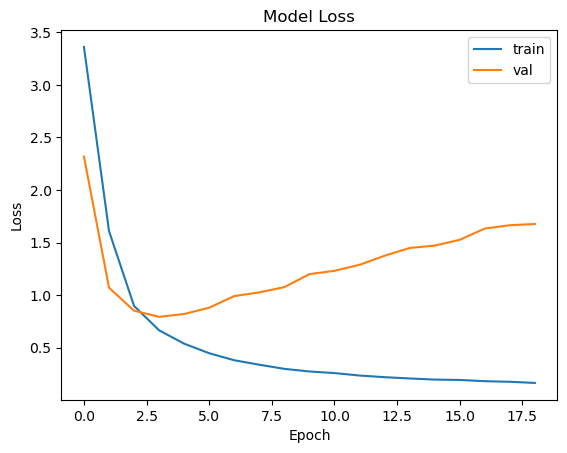

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('model_loss.png')

plt.show()


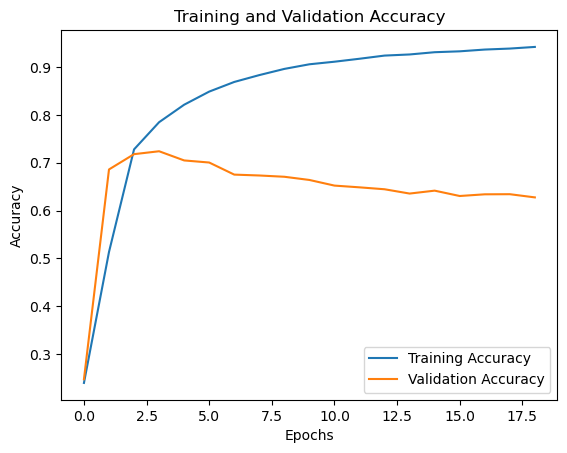

In [106]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('model_accuracy.png')
plt.show()

In [108]:
### Result Analysis

In [110]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
target_names=np.unique((label_encoder.inverse_transform(y)))
report = classification_report(y_val, y_pred_classes,target_names=target_names)
print("Classification Report:")
print(report)

257/257 [==============================] - 8s 30ms/step
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.75      0.77      0.76      1096
Extremely Positive       0.82      0.64      0.72      1325
          Negative       0.69      0.63      0.66      1983
           Neutral       0.82      0.79      0.81      1536
          Positive       0.65      0.79      0.71      2284

          accuracy                           0.72      8224
         macro avg       0.75      0.72      0.73      8224
      weighted avg       0.73      0.72      0.72      8224



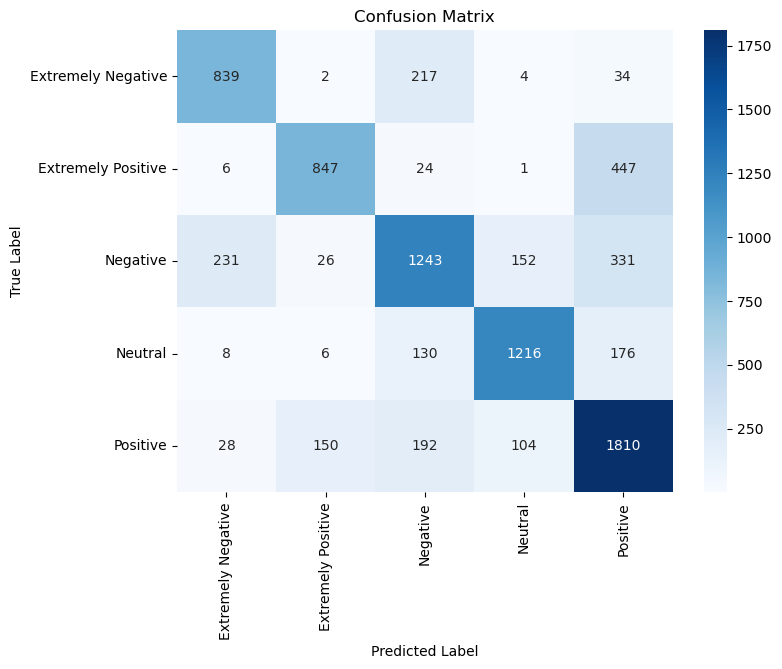

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

plt.show()


In [114]:
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)